# Pair Programming Métricas

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

- Calculad las métricas para vuestro modelo
- Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

<h2>Tabla de Contenidos<span class="tocSkip"></span></h2>

1. Modelo 1: Archivo estandarizado y codificado
2. Modelo 2: Archivo codificado 
3. Matriz de confusión de modelo 1 y modelo 2
4. Métricas

    4.1 Métricas modelo 1

    4.2 Métricas modelo 2

    4.3  Métricas comparadas

5. Observaciones adicionales

    5.1 ROC
    
    5.2 Posibe Interpretación con enfoque de negativos

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Gestión datos desbalanceados
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

#  Métricas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

Debemos abrir el archivo csv porque al abrir el tipo pikle, el método SMOTETomek genera nulos en las variables categóricas. Se intentó convertir estas catergorías a numéricas, pero seguía sin reconocerlas.

## Modelo 1: Archivo estandarizado y codificado

In [2]:
# Archivo balanceado codificado y estandarizado
df1 = pd.read_csv("../files_rl/4-heart-bal_encoding-estandarizado.csv", index_col=0)
df1.head(2)

,fastingbs,restingecg,exerciseangina,st_slope,heartdisease,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA,age,restingbp,maxhr,oldpeak,cholesterol
0,0,1,1,3,0,0,1,0,1,0,0,-1.076923,0.5,0.944444,-0.400000,0.870840
1,0,1,1,1,1,1,0,0,0,1,0,-0.384615,1.5,0.500000,0.266667,-1.185764


 ### 1.1 Balanceo de variable respuesta con método `SMOTETomek()`

In [3]:
df1['heartdisease'].value_counts()

1    507
0    410
Name: heartdisease, dtype: int64

In [4]:
# Separar en X e y y en train y test
X = df1.drop('heartdisease', axis=1)
y = df1['heartdisease']

#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [5]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res= os_us.fit_resample(X_train, y_train)

In [6]:
print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Distribution before resampling 
 1    363
0    278
Name: heartdisease, dtype: int64
..............................................................
Distribución después del ajuste 
 1    333
0    333
Name: heartdisease, dtype: int64


### 1.2 Ajuste y predicción del modelo 1

In [7]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(X_train_res,y_train_res)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(X_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(X_test)

In [8]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.sample(8)

,Real,Predicted,Set
219,0,0,Train
502,0,1,Train
897,0,0,Train
300,1,1,Train
46,0,0,Test
597,1,1,Train
440,1,0,Train
520,1,1,Test


## Modelo 2: Archivo codificado 

In [9]:
# Archivo balanceado codificado
df2 = pd.read_csv("../files_rl/4-heart-bal_encoding.csv", index_col=0)
df2.head(2)

,age,restingbp,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,cholesterol,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA
0,40,140,0,1,172,1,0.0,3,0,289.0,0,1,0,1,0,0
1,49,160,0,1,156,1,1.0,1,1,180.0,1,0,0,0,1,0


 ### 2.1 Balanceo de variable respuesta con método `SMOTETomek()`

In [10]:
df2['heartdisease'].value_counts()

1    507
0    410
Name: heartdisease, dtype: int64

In [11]:
# separamos los datos en X e y

X2 = df2.drop("heartdisease", axis = 1)
y2 = df2["heartdisease"]

In [12]:
#dividimos en sets de entrenamiento y test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.7)

In [13]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res2, y_train_res2= os_us.fit_resample(X_train2, y_train2)

In [14]:
print (f"Distribution before resampling \n {y_train2.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res2.value_counts()}")

Distribution before resampling 
 1    369
0    272
Name: heartdisease, dtype: int64
..............................................................
Distribución después del ajuste 
 1    340
0    340
Name: heartdisease, dtype: int64


### 2.2 Ajuste y predicción del modelo 2

In [15]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg2 = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg2.fit(X_train_res2,y_train_res2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train2 = log_reg2.predict(X_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test2 = log_reg2.predict(X_test2)

/home/ximenaptm/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
train_df2 = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train2, 'Set': ['Train2']*len(y_train2)})
test_df2  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test2,  'Set': ['Test2']*len(y_test2)})
resultados2 = pd.concat([train_df2,test_df2], axis = 0)
resultados2.sample(8)

,Real,Predicted,Set
849,1,1,Train2
478,1,1,Train2
888,1,0,Train2
626,0,0,Test2
2,0,0,Test2
905,0,0,Train2
570,1,1,Train2
831,0,0,Train2


## 3. Matriz de confusión de modelo 1 y modelo 2

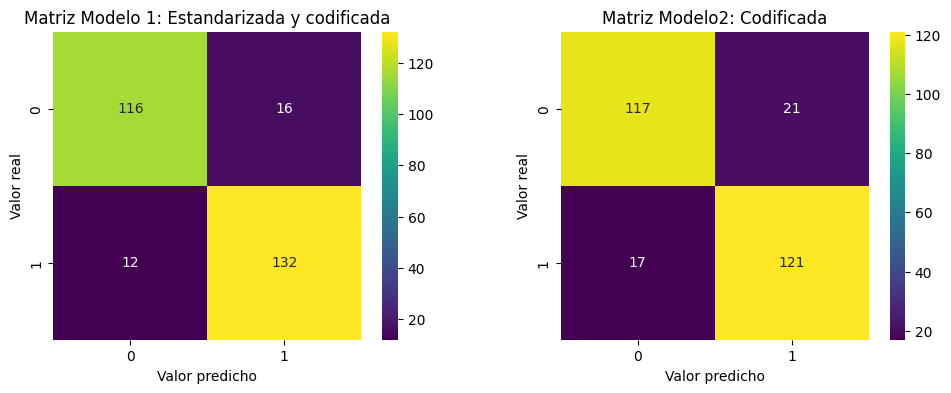

In [17]:
fig, ax  = plt.subplots(1, 2, sharex='col', figsize=(12, 4))

mat_lr1 = confusion_matrix(y_test, y_pred_test)
mat_lr2 = confusion_matrix(y_test2, y_pred_test2)

sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis", ax=ax[0])
ax[0].set_title("Matriz Modelo 1: Estandarizada y codificada")
ax[0].set_ylabel("Valor real")
ax[0].set_xlabel("Valor predicho")

# MATRIZ DE CORRELACIÓN PARA DATOS 2

sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis", ax=ax[1])
ax[1].set_title("Matriz Modelo2: Codificada")
ax[1].set_ylabel("Valor real")
ax[1].set_xlabel("Valor predicho")

plt.show();


La variable respuesta `heartdisease` o `cardiopatía` está dividida de la siguiente forma: 

- 0: No, normal *no existe cardiopatía* 
- 1: Sí, cardiopaía *si existe cardiopatía* 

- Al comparar las matrices observamos que el modelo 2 captura mayor número de valores verdaderos positivos, así mismo, este modelo captura menor número de falsos positivos y de falsos negativos. El relación a los verdadeos negativos, captura un caso menos. 


# 4. Métricas

In [18]:
# Función para sacar las métricas

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

## 4.1 Interpretación del modelo 1, con datos estandarizados y codificados

In [19]:
results_logistic_1 = metricas(y_test, y_pred_test, y_train, y_pred_train, "Regresión logistica Est-Cod")
results_logistic_1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.898551,0.891892,0.916667,0.904110,0.79646,test,Regresión logistica Est-Cod
1,0.848674,0.867403,0.865014,0.866207,0.69206,train,Regresión logistica Est-Cod


1. Establecemos nuestro probema, en este caso nos interesa identificar si un paciente tiene el corazón normal, 0, o presenta alguna cardiopatía, 1.  Es por ello, que priorizamos los falsos negativos, es decir, que nuestro modelo nos arroje que presenta cardiopatía, pero lo real es que es normal.

2 *Accuracy*: nuestro modelo acierta el 86% de la veces. `Mide  que porcentaje de los valores predichos están bien predichos` 

3. Precisión y recall. 


4 *Precision*:  El modelo acierta en el test el 86% de las veces que prediga que un corazón es normal.   
`¿Qué porcentaje de predicciones positivas fueron correctas?`

- *Recall*: El modelo captura el 88% de casos positivos reales. Esta métrica es más alta que la precisión y al interesarnos los Falsos negativos, observamos que esta métrica es buena, en relación a la precisión. 
`*sensibilidad* o *exhaustividad*, porcentaje de casos negativos fueron capturados?`


5. *f1*: El valor de f1 es 0.87, por lo tanto el modelo es bueno


6. *kappa* tenemos un valor de 0.72.Esto en realidad nos esta diciendo que la concordancia de nuestros datos es buena, es decir, que nuestro modelo no esta acertando en sus predicciones por puro azar. 
`es una medida de concordancia que se basa en comparar la concordancia observada en un conjunto de datos`


**El *overfitting*  y el *underfitting*?**:

No se identifica ninguna de las dos situaciones.

## 4.2 Interpretación del modelo , con datos codificados

In [20]:
results_logistic_2 = metricas(y_test2, y_pred_test2, y_train2, y_pred_train2, "Regresión logistica Cod")
results_logistic_2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.862319,0.852113,0.876812,0.864286,0.724638,test,Regresión logistica Cod
1,0.859594,0.882192,0.872629,0.877384,0.713162,train,Regresión logistica Cod


Si miramos los datos del test: 

1. Establecemos nuestro probema, en este caso nos interesa identificar si un paciente tiene el corazón normal, 0, o presenta alguna cardiopatía, 1.  Es por ello, que priorizamos los falsos negativos, es decir, que nuestro modelo nos arroje que presenta cardiopatía, pero lo real es que es normal.

2 *Accuracy*: nuestro modelo acierta el 89% de la veces. `Mide  que porcentaje de los valores predichos están bien predichos` 

3 *Precision*:  tenemos un valor de 0.89, por lo que nuestro modelo se equivocará un 11% de las veces que prediga que un paciente tiene el corazón normal. 
`¿Qué porcentaje de predicciones positivas fueron correctas?`

4 *Recall*: tenemos un valor de 0.89. Es decir, nuestro modelo es capaz de identificar un 89% de los pacientes sin cordiopatía, corazones normales.
`*sensibilidad* o *exhaustividad*, porcentaje de casos positivos fueron capturados?`

5. *f1*: El valor de f1 es 0.89, por lo tanto el modelo es bueno.

6 *kappa* tenemos un valor de 0.78. Esto en realidad nos esta diciendo que la concordancia de nuestros datos es bueno, es decir, que nuestro modelo no esta acertando en sus predicciones por azar. 
`es una medida de concordancia que se basa en comparar la concordancia observada en un conjunto de datos`


## 4.3 Métricas comparadas

In [21]:
resultados_todo = pd.concat([results_logistic_1, results_logistic_2], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.898551,0.891892,0.916667,0.904110,0.796460,test,Regresión logistica Est-Cod
1,0.848674,0.867403,0.865014,0.866207,0.692060,train,Regresión logistica Est-Cod
0,0.862319,0.852113,0.876812,0.864286,0.724638,test,Regresión logistica Cod
1,0.859594,0.882192,0.872629,0.877384,0.713162,train,Regresión logistica Cod


Si comparamos nuestros datos predichos en el test por ambos modelos, observamos: 

``Establecemos nuestro probema, en este caso nos interesa identificar si un paciente tiene el corazón normal, 0, o presenta alguna cardiopatía, 1.  Es por ello, que priorizamos los falsos negativos, es decir, que nuestro modelo nos arroje que presenta cardiopatía, pero lo real es que es normal.``

- *Accuracy*: El porcentaje de aciertos es mejor en modelo 1, el modelo de Regresión Logística con datos solo codificados. 
`Mide  que porcentaje de los valores predichos están bien predichos` 

- *Precision*:  La precisión tambiés es mejor en el modelo que está solo codificado.
`¿Qué porcentaje de predicciones positivas fueron correctas?`

- *Recall*: El recall es mejor en el modelo 2, sólo codificado con un 0.01.
`*sensibilidad* o *exhaustividad*, porcentaje de casos positivos fueron capturados?`

- *f1*: El valor del modelo 2 es mejor en 0.02

- *kappa* tenemos un valor de 0.78 en el codificado y en el otro 0.72, por lo tanto, el modelo codificado tiene una concordancia más alta en la predicción de los datos, es mejor.  
`es una medida de concordancia que se basa en comparar la concordancia observada en un conjunto de datos`

Concluimos que el modelo 2, con datos sólo codificados, arroja mejores resultados a la hora de predecir la variable de la existencia o no de cardiopatías, heartdiseases.


# 5. Observaciones adicionales

## 5.1 ROC

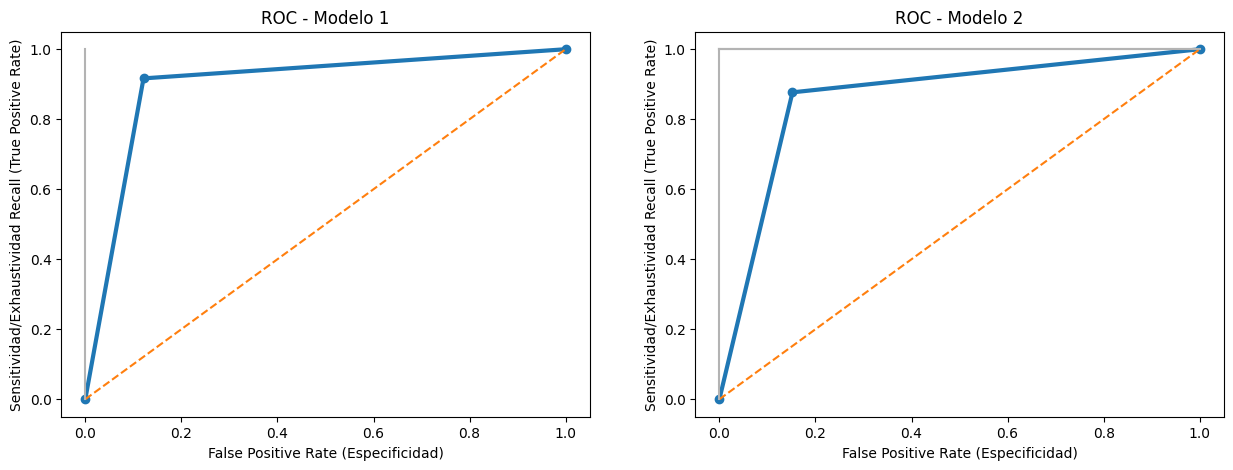

In [22]:
fig, axs  = plt.subplots(nrows=1, ncols=2, sharex='col', figsize=(15, 5))

#modelo down
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_test)

#modelo up
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test2, y_pred_test2)


#create ROC curve
axs[0].plot(false_positive_rate1, true_positive_rate1, '-o', LineWidth=3)
axs[0].plot([0, 1], ls="--")
axs[0].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
axs[0].set_title('ROC - Modelo 1')
axs[0].set_ylabel('Sensitividad/Exhaustividad Recall (True Positive Rate)')
axs[0].set_xlabel('False Positive Rate (Especificidad)')


#create ROC curve
axs[1].plot(false_positive_rate2, true_positive_rate2, '-o', LineWidth=3 )
axs[1].plot([0, 1], ls="--")
axs[1].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
axs[1].set_title('ROC - Modelo 2')
axs[1].set_ylabel('Sensitividad/Exhaustividad Recall (True Positive Rate)')
axs[1].set_xlabel('False Positive Rate (Especificidad)')

plt.show();

La **curva ROC** ( *Receiver Operating Characteristic*)  representa la sensibilidad **recall** ( o ratio de verdareros positivos) frente a 1 **especificidad**, (¿Qué porcentaje de casos negativos fueron capturados? o ratio de falsos positivos). Estas gráfias nos dicen como de bien son capaces de distinguir nuestros modelos entre ser positivo o no. Observamos que en el modelo 2, se predicen con mayor exactitud ya que la línea está más cercana a 1.

## 5.2 Posibe Interpretación con enfoque de negativos

In [23]:
# Fórmula especificidad modelo 1, estandarizado y codificado.
127 / (127+22)

0.8523489932885906

In [24]:
# Fórmula especificidad modelo 2, codificado.
134 / (134+20)

0.8701298701298701

Nos percatamos que nos hemos centrado en detectar aquellos pacientes que tienen el cozarón normal. Sin embargo, si quisieramos enfocarnos en pacientes no normales o con cardiopatía, deberíamos mirar los valores verdaderos negativos y faltos positivos.
Para analizar usaremos la métrica de especificidad, que nos dice el porcentaje de casos negativos capturados.
Al aplicar la fórmula no arroja que sería 0.85 para el modelo estandarizado y codificado; y para el otro modelo es 0.87. Por lo tanto, el segundo modelo captura mejor nuestros negativos.